In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [3]:
model = torch.hub.load('pytorch/vision:v0.9.0', 'resnet18', pretrained=True)
#model.eval()
#model=model.to(device)


Downloading: "https://github.com/pytorch/vision/zipball/v0.9.0" to /root/.cache/torch/hub/v0.9.0.zip
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [4]:
def get_activations(model, x):
    activations = []
    x = model.conv1(x)
    x = model.bn1(x)
    x = model.relu(x)
    activations.append(x[:,0,:,:].unsqueeze(1).detach().numpy())
    x = model.maxpool(x)
    x = model.layer1(x)
    activations.append(x[:,0,:,:].unsqueeze(1).detach().numpy())
    x = model.layer2(x)
    activations.append(x[:,0,:,:].unsqueeze(1).detach().numpy())
    x = model.layer3(x)
    activations.append(x[:,0,:,:].unsqueeze(1).detach().numpy())
    x = model.layer4(x)
    activations.append(x[:,0,:,:].unsqueeze(1).detach().numpy())
    x = model.avgpool(x)
    x = torch.flatten(x, 1)
    x = model.fc(x)
    activations.append(x.detach().numpy())
    return activations


In [38]:
def display_activations(images, activations):
    n_activations = len(activations)
    fig, axarr = plt.subplots(1, n_activations+1, figsize=(10,10))
    axarr[0].imshow(images[0].permute(1, 2, 0))
    axarr[0].imshow(images[1].permute(1, 2, 0))
    axarr[0].imshow(images[2].permute(1, 2, 0))
    axarr[0].imshow(images[3].permute(1, 2, 0))
    axarr[0].axis('off')
    for i in range(n_activations):
        axarr[i+1].imshow(activations[i][0])
        axarr[i+1].axis('off')
        # print(activations[i][0].shape)
    plt.show()

In [39]:
# for i, (images, labels) in enumerate(testloader):
#   # print(i,"yes i number")
#   # print(labels)
#   activations = get_activations(model,images)
#   for k in range(4):
#      display_activations(images,activations[k])
#   if(i==4):
#     break
  

In [44]:
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10

In [45]:
class ResNet18(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet18, self).__init__()
        self.resnet18 = torchvision.models.resnet18(pretrained=False)
        self.resnet18.fc = nn.Linear(512, num_classes)  # change last layer for CIFAR-10
        #0.2 0.2 0.2 0.2
        #0.5 0.2 0.1 0.3
        # Add dropout layers
        self.dropout1 = nn.Dropout(p=0.5)
        self.dropout2 = nn.Dropout(p=0.4)
        self.dropout3 = nn.Dropout(p=0.3)
        self.dropout4 = nn.Dropout(p=0.2)
        
    def forward(self, x):
        x = self.resnet18.conv1(x)
        x = self.resnet18.bn1(x)
        x = self.resnet18.relu(x)
        x = self.resnet18.maxpool(x)

        x = self.resnet18.layer1(x)
        x = self.dropout1(x)  # add dropout after layer1

        x = self.resnet18.layer2(x)
        x = self.dropout2(x)  # add dropout after layer2

        x = self.resnet18.layer3(x)
        x = self.dropout3(x) #add dropout after layer3
        x = self.resnet18.layer4(x)
        x = self.dropout4(x) #add dropout after layer4
        x = self.resnet18.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.resnet18.fc(x)

        return x

modeltiny = ResNet18()

In [46]:
def get_activationss(model, x):
    activations = []
    x = model.resnet18.conv1(x)
    x = model.resnet18.bn1(x)
    x = model.resnet18.relu(x)
    activations.append(x[:,0,:,:].unsqueeze(1).detach().numpy())
    x = model.resnet18.maxpool(x)
    x = model.resnet18.layer1(x)
    x = model.dropout1(x)
    activations.append(x[:,0,:,:].unsqueeze(1).detach().numpy())
    x = model.resnet18.layer2(x)
    x = model.dropout2(x)
    activations.append(x[:,0,:,:].unsqueeze(1).detach().numpy())
    x = model.resnet18.layer3(x)
    activations.append(x[:,0,:,:].unsqueeze(1).detach().numpy())
    x = model.resnet18.layer4(x)
    activations.append(x[:,0,:,:].unsqueeze(1).detach().numpy())
    x = model.resnet18.avgpool(x)
    x = torch.flatten(x, 1)
    x = model.resnet18.fc(x)
    activations.append(x.detach().numpy())
    return activations


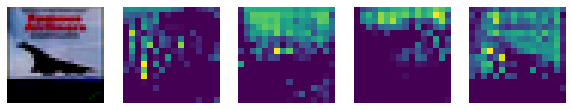

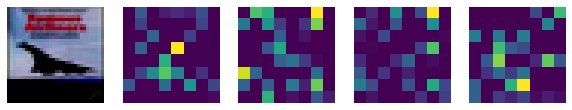

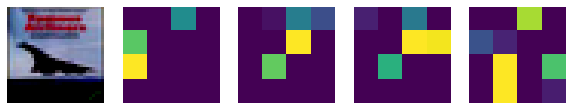

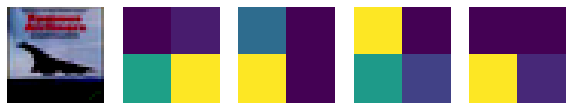

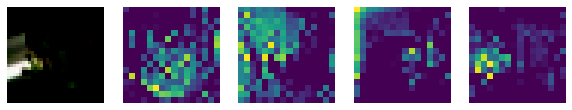

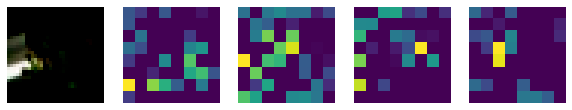

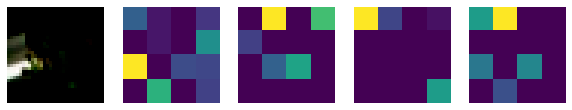

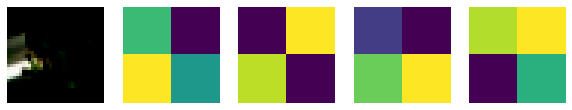

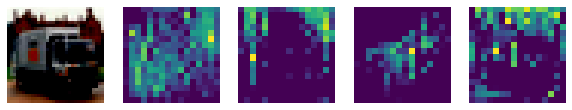

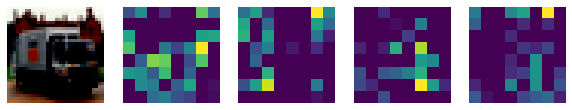

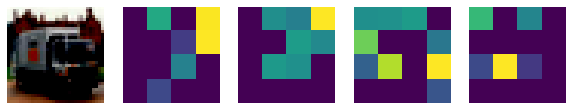

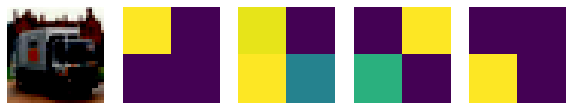

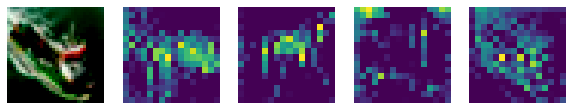

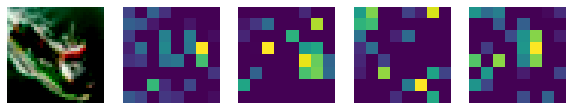

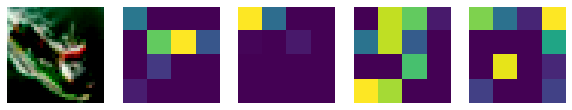

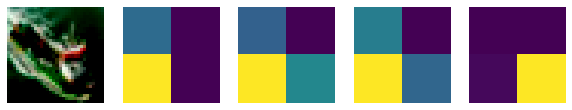

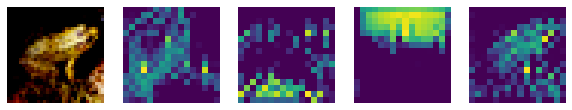

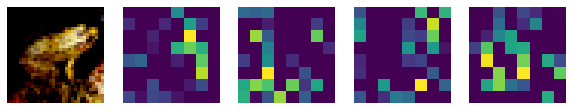

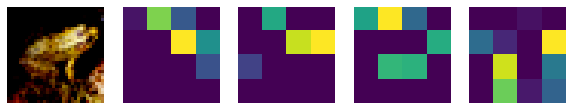

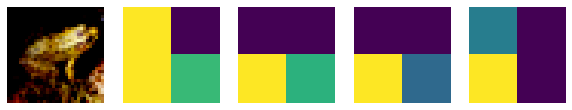

In [47]:
for i, (images, labels) in enumerate(testloader):
  # print(i,"yes i number")
  # print(labels)
  activations = get_activationss(modeltiny,images)
  for k in range(4):
     display_activations(images,activations[k])
  if(i==4):
    break